In [40]:
import keras

# Keras
Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

In [41]:
import tensorflow

In [42]:
# first neural network with keras tutorial
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split


# Loading Dataset
lets load the pima datasets for our project. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

In [43]:
# load the dataset
df = pd.read_csv('diabetes.csv')
# check data info
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df.shape

(768, 9)

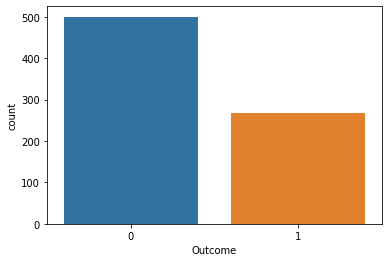

In [45]:
sns.countplot(x=df.Outcome)

# Make the DL model
Now lets build a simple deep learning model for solving out classifiatoin problem. (as you see this model is not that deep)

In [46]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Now, its time to determine the loss function, optimiser and the performance metric for our simple DL model.

In [47]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data Division and Training
Now the model structure is ready for training. Lets divide out dataset to train and test set and send out the training part for training and check the final performance with the testing dataset.

In [48]:
# data division
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
62/62 [==============================] - 1s 1ms/step - loss: 5.2987 - accuracy: 0.5277
Epoch 2/100
62/62 [==============================] - 0s 1ms/step - loss: 2.7653 - accuracy: 0.4805
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 1.5834 - accuracy: 0.5375
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 1.1187 - accuracy: 0.5879
Epoch 5/100
62/62 [==============================] - 0s 1ms/step - loss: 0.9267 - accuracy: 0.6026
Epoch 6/100
62/62 [==============================] - 0s 1ms/step - loss: 0.9207 - accuracy: 0.5912
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 0.8631 - accuracy: 0.6156
Epoch 8/100
62/62 [==============================] - 0s 1ms/step - loss: 0.7924 - accuracy: 0.6221
Epoch 9/100
62/62 [==============================] - 0s 1ms/step - loss: 0.7888 - accuracy: 0.6205
Epoch 10/100
62/62 [==============================] - 0s 1ms/step - loss: 0.7673 - accuracy: 0.6336
Epoch 11/

# Evaluation
Now lets evaluate the build DL model performance in taining and testing phase. 

In [50]:
# evaluate the keras model
_, training_accuracy = model.evaluate(X_train, y_train)
_, testing_accuracy = model.evaluate(X_test, y_test)
print('Training Accuracy: %.2f' % (training_accuracy*100))
print('Testing Accuracy: %.2f' % (testing_accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7078
Training Accuracy: 75.24
Testing Accuracy: 70.78


dict_keys(['loss', 'accuracy'])


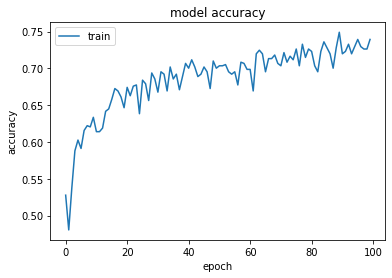

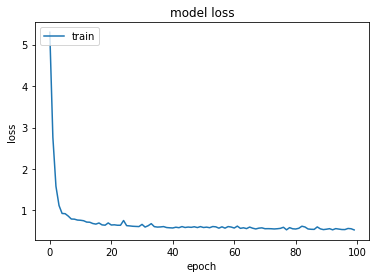

In [52]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Check the predictions
you can also actually see what are the predictions with this model.

In [53]:
# make probability predictions with the model
predictions = model.predict(X_test)
# round predictions 
rounded = [round(x[0]) for x in predictions]
print('list of prediction:', rounded)
print('real values:', list(y_test))

list of prediction: [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
real values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
